In [78]:
pip install imbalanced-learn


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('loan_prediction.csv')


In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180.0,1.0,Rural,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,int64
Loan_Amount_Term,float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [8]:
df.shape

(381, 13)

***TAKING CARE OF MISSING DATA***

In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [10]:
mean_Loan_Amount_Term=df['Loan_Amount_Term'].mean()
df['Loan_Amount_Term'].fillna(mean_Loan_Amount_Term,inplace=True)

In [11]:
mode_Gender=df['Gender'].mode().iloc[0]
df['Gender'].fillna('mode_Gender',inplace=True)

In [12]:
mode_Self_Employed=df['Self_Employed'].mode().iloc[0]
df['Self_Employed'].fillna('mode_Self_Employed',inplace=True)

In [13]:
mode_Credit_History = df['Credit_History'].mode().iloc[0]
df['Credit_History'].fillna(mode_Credit_History, inplace=True)

In [40]:

df['Dependents'] = df['Dependents'].replace('3+', 4).astype(float)
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)


In [41]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [42]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,293.000000,293.000000,293.000000,293.000000,293.0,293.000000
mean,0.726962,3454.119454,1112.519181,107.699659,360.0,0.870307
std,1.164776,1161.745110,1176.554326,25.630513,0.0,0.336540
min,0.000000,150.000000,0.000000,36.000000,360.0,0.000000
25%,0.000000,2600.000000,0.000000,95.000000,360.0,1.000000
50%,0.000000,3316.000000,1041.000000,111.000000,360.0,1.000000
75%,1.000000,4191.000000,2033.000000,128.000000,360.0,1.000000
max,4.000000,6783.000000,5063.000000,150.000000,360.0,1.000000


***REMOVING OUTLIERS***

*BOXPLOT*

<Axes: >

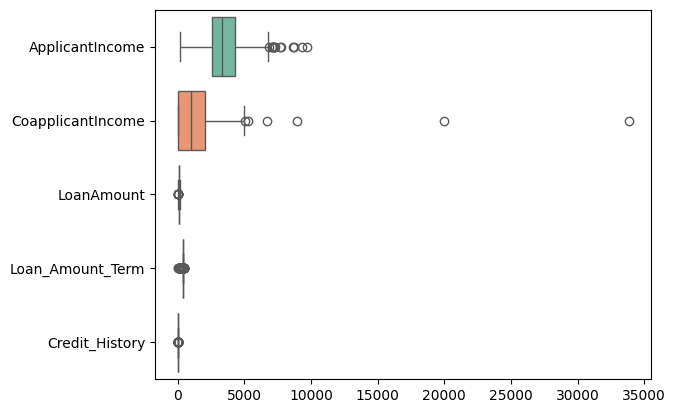

In [16]:
sns.boxplot(data=df,orient='h',palette='Set2')

<Axes: xlabel='ApplicantIncome'>

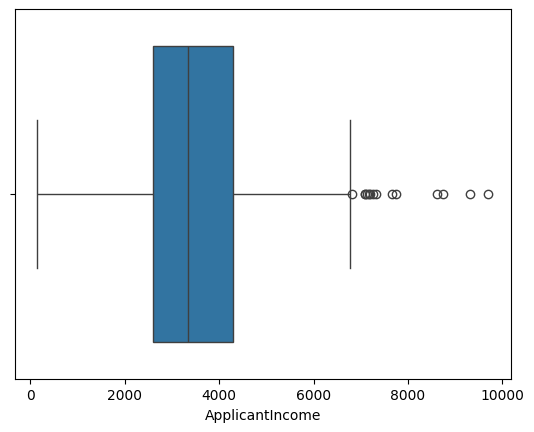

In [17]:
sns.boxplot(x=df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

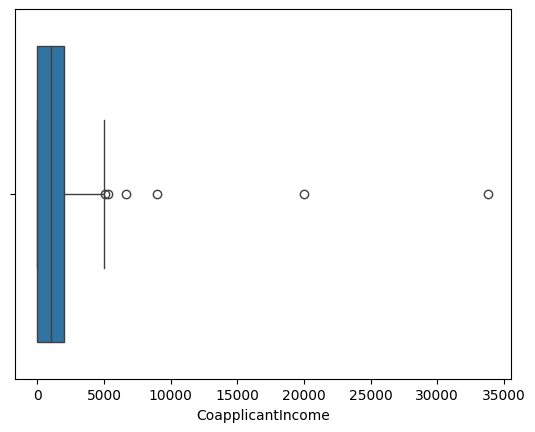

In [18]:
sns.boxplot(x=df['CoapplicantIncome'])

In [19]:
def remove_outliers_iqr(df, column, lower_bound_factor=1.5, upper_bound_factor=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - lower_bound_factor * iqr
    upper_bound = q3 + upper_bound_factor * iqr
    df_filtered = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


columns_with_numerical_data = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


for column in columns_with_numerical_data:
    df = remove_outliers_iqr(df, column)

<Axes: xlabel='ApplicantIncome'>

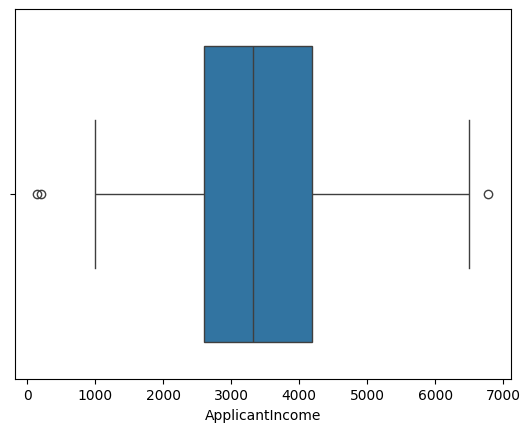

In [20]:
sns.boxplot(x=df['ApplicantIncome'])

<Axes: >

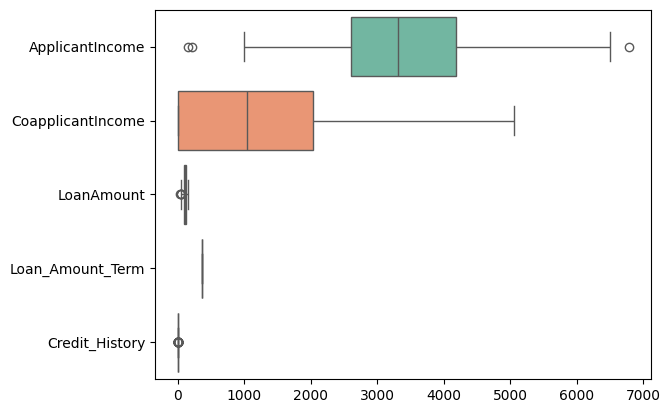

In [21]:
sns.boxplot(data=df,orient='h',palette='Set2')

In [43]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [44]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
375,LP002943,Male,No,0.0,Graduate,No,2987,0.0,88,360.0,0.0,Semiurban
376,LP002953,Male,Yes,4.0,Graduate,No,5703,0.0,128,360.0,1.0,Urban
377,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108,360.0,1.0,Rural
378,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71,360.0,1.0,Rural


In [45]:
print(y)

0      N
1      Y
2      Y
3      Y
4      Y
      ..
375    N
376    Y
377    Y
378    Y
380    N
Name: Loan_Status, Length: 293, dtype: object


***SMOTE***(*Synthetic Minority Over-sampling Technique*) ***IMPLEMENTATION***

<Axes: xlabel='Loan_Status', ylabel='count'>

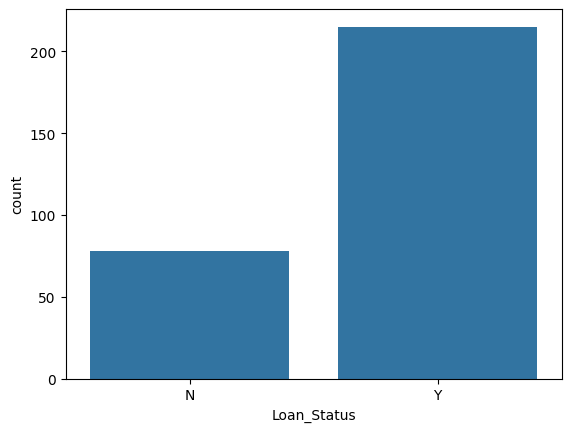

In [79]:
sns.countplot(x='Loan_Status', data=df)

***ENCODING DEPENDENT DATA***



In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [47]:
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0])

***ENCODING INDEPENDENT DATA***

In [48]:
X= pd.get_dummies(X, columns=['Property_Area'])

In [49]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,True,False,False
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,False,False,True
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,False,False,True
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,False,False,True
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,LP002943,Male,No,0.0,Graduate,No,2987,0.0,88,360.0,0.0,False,True,False
376,LP002953,Male,Yes,4.0,Graduate,No,5703,0.0,128,360.0,1.0,False,False,True
377,LP002974,Male,Yes,0.0,Graduate,No,3232,1950.0,108,360.0,1.0,True,False,False
378,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71,360.0,1.0,True,False,False


In [55]:
remaining_columns = ['Married', 'Education', 'Self_Employed', 'Gender', 'Credit_History', 'Dependents']
available_columns = [col for col in remaining_columns if col in X.columns]
X = pd.get_dummies(X, columns=available_columns)

In [56]:
X

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,...,Self_Employed_mode_Self_Employed,Gender_Female,Gender_Male,Gender_mode_Gender,Credit_History_0.0,Credit_History_1.0,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_4.0
0,LP001003,4583,1508.0,128,360.0,True,False,False,False,True,...,False,False,True,False,False,True,False,True,False,False
1,LP001005,3000,0.0,66,360.0,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
2,LP001006,2583,2358.0,120,360.0,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
3,LP001008,6000,0.0,141,360.0,False,False,True,True,False,...,False,False,True,False,False,True,True,False,False,False
4,LP001013,2333,1516.0,95,360.0,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,LP002943,2987,0.0,88,360.0,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
376,LP002953,5703,0.0,128,360.0,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,True
377,LP002974,3232,1950.0,108,360.0,True,False,False,False,True,...,False,False,True,False,False,True,True,False,False,False
378,LP002978,2900,0.0,71,360.0,True,False,False,True,False,...,False,True,False,False,False,True,True,False,False,False


In [57]:
X= X.drop(columns=['Loan_ID'])

***SPLITTING INTO TRAINING AND TESTING SET***




*SMOTE (*Synthetic Minority Over-sampling Technique*) IMPLEMENTATION*

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [95]:
print(pd.Series(y_train_smote).value_counts())

1    155
0    155
Name: count, dtype: int64


In [83]:
X_train_smote

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_mode_Self_Employed,Gender_Female,Gender_Male,Gender_mode_Gender,Credit_History_0.0,Credit_History_1.0,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_4.0
0,2550,2042.000000,126,360.0,True,False,False,True,False,False,...,True,False,True,False,False,True,True,False,False,False
1,2383,2138.000000,58,360.0,True,False,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
2,4333,2451.000000,110,360.0,False,False,True,False,True,True,...,False,False,True,False,False,True,True,False,False,False
3,3500,1083.000000,135,360.0,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,2479,0.000000,59,360.0,False,False,True,True,False,True,...,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2319,0.000000,58,360.0,True,True,False,True,False,True,...,False,True,False,False,True,True,True,False,False,False
306,1486,590.156015,110,360.0,True,True,False,True,True,True,...,False,True,True,False,True,True,True,False,False,False
307,6131,0.000000,123,360.0,True,True,False,True,True,True,...,False,False,True,False,True,True,True,False,False,True
308,2186,1848.028835,103,360.0,False,True,True,True,False,True,...,False,True,False,False,True,False,True,False,False,False


In [84]:
X_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes,Education_Graduate,...,Self_Employed_mode_Self_Employed,Gender_Female,Gender_Male,Gender_mode_Gender,Credit_History_0.0,Credit_History_1.0,Dependents_0.0,Dependents_1.0,Dependents_2.0,Dependents_4.0
110,1916,5063.0,67,360.0,True,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
338,3617,0.0,107,360.0,False,True,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
59,2366,2531.0,136,360.0,False,True,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False
220,5500,0.0,105,360.0,True,False,False,False,True,True,...,False,True,False,False,True,False,True,False,False,False
183,4400,0.0,127,360.0,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3927,800.0,112,360.0,False,True,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
140,4735,0.0,138,360.0,False,False,True,False,True,False,...,False,False,True,False,False,True,True,False,False,False
270,2666,4300.0,121,360.0,True,False,False,False,True,True,...,False,False,True,False,False,True,True,False,False,False
193,4000,2500.0,140,360.0,True,False,False,True,False,True,...,False,False,True,False,False,True,True,False,False,False


In [85]:
X.dtypes

,0
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,int64
Loan_Amount_Term,float64
Property_Area_Rural,bool
Property_Area_Semiurban,bool
Property_Area_Urban,bool
Married_No,bool
Married_Yes,bool
Education_Graduate,bool


***FEATURE SCALING***

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test)

# ***KNN***

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

***CONFUSION MATRIX***

In [101]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 9 19]
 [ 1 59]]


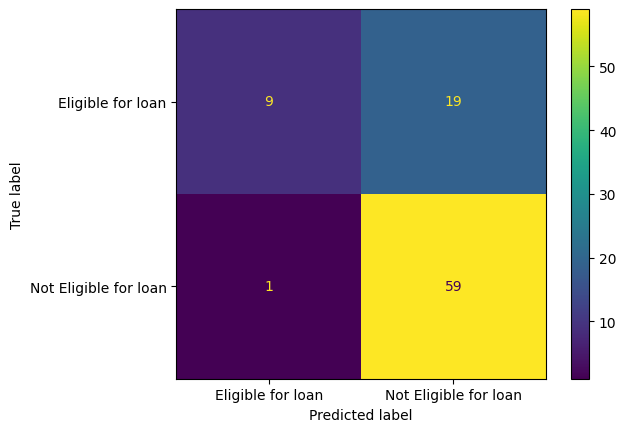

In [102]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Eligible for loan", "Not Eligible for loan"])
cm_display.plot()
plt.show()

In [143]:
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the KNN Model:", Accuracy*100)

Precision = metrics.precision_score(y_test,y_pred)
print("Precision of the KNN Model:", Precision*100)

Recall = metrics.recall_score(y_test,y_pred)
print("Recall of the KNN Model:", Recall*100)

f1score = metrics.f1_score(y_test, y_pred)
print("F1 score of the KNN Model:", f1score)

Accuracy of the KNN Model: 78.4090909090909
Precision of the KNN Model: 76.62337662337663
Recall of the KNN Model: 98.33333333333333
F1 score of the KNN Model: 0.8613138686131386


***PREDICTING TEST RESULTS***

In [104]:
print(y_pred,y_test)

[1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 0 1 1 1]


***K FOLD CROSS VALIDATION***

In [105]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.68 %
Standard Deviation: 10.87 %


***GRID SEARCH***

In [106]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train_smote, y_train_smote)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 8}
Accuracy for our training dataset with tuning is : 90.32%


# ***RANDOM FOREST***



***Training***

In [107]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

***PREDICTING THE TEST RESULTS***

In [108]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


 ***CONFUSION MATRIX***

In [118]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14 14]
 [ 6 54]]


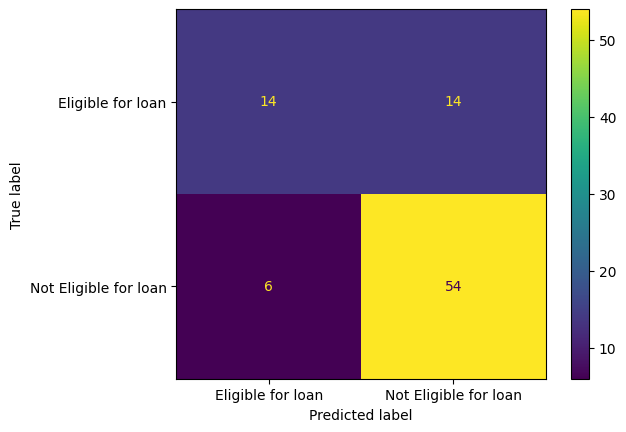

In [119]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Eligible for loan", "Not Eligible for loan"])
cm_display.plot()
plt.show()

In [142]:
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest Model:", Accuracy*100)

Precision = metrics.precision_score(y_test,y_pred)
print("Precision of the Random Forest Model:", Precision*100)

Recall = metrics.recall_score(y_test,y_pred)
print("Recall of the Random Forest Model:", Recall*100)

f1score = metrics.f1_score(y_test, y_pred)
print("F1 score of the Random Forest Model:", f1score)

Accuracy of the Random Forest Model: 78.4090909090909
Precision of the Random Forest Model: 76.62337662337663
Recall of the Random Forest Model: 98.33333333333333
F1 score of the Random Forest Model: 0.8613138686131386


***K-FOLD CROSS VALIDATION***

In [121]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.71 %
Standard Deviation: 5.25 %


# ***HYPERPARAMETER TUNING***

***GRID SEARCH***

In [123]:
rf = RandomForestClassifier()
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train_smote,y_train_smote)
print('Best hyperparameters are: '+str(model_grid.best_params_))
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best hyperparameters are: {'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for our training dataset with tuning is : 90.32%


# ***DECISION TREE***


***Training***

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

***CONFUSION*** ***MATRIX***

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14 14]
 [ 6 54]]


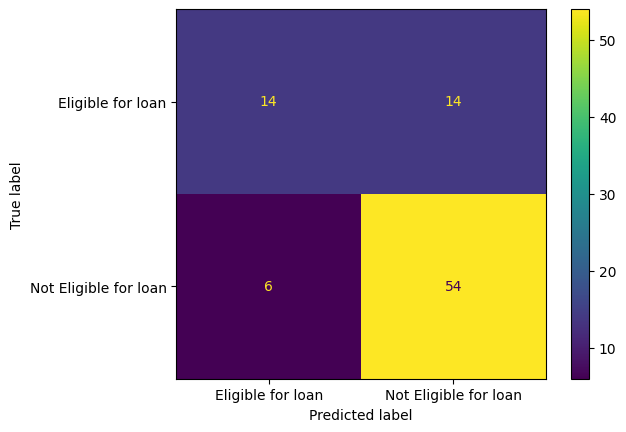

In [125]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Eligible for loan", "Not Eligible for loan"])
cm_display.plot()
plt.show()

In [141]:
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree :", Accuracy*100)

Precision = metrics.precision_score(y_test,y_pred)
print("Precision of the Decision Tree :", Precision*100)

Recall = metrics.recall_score(y_test,y_pred)
print("Recall of the Decision Tree :", Recall*100)

f1score = metrics.f1_score(y_test, y_pred)
print("F1 score of the Decision Tree:", f1score)

Accuracy of the Decision Tree : 78.4090909090909
Precision of the Decision Tree : 76.62337662337663
Recall of the Decision Tree : 98.33333333333333
F1 score of the Decision Tree: 0.8613138686131386


***PREDICTING THE TEST RESULTS***

In [127]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


***K FOLD CROSS VALIDATION***

In [128]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.71 %
Standard Deviation: 5.25 %


# ***KERNEL SVM***

***TRAINING***

In [129]:
from sklearn.svm import SVC
classifier = SVC( probability=True,kernel = 'linear', random_state = 0)
classifier.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', probability=True, random_state=0)

***PREDICTING THE TEST RESULTS***

In [130]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


***CONFUSION MATRIX***

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[10 18]
 [ 1 59]]


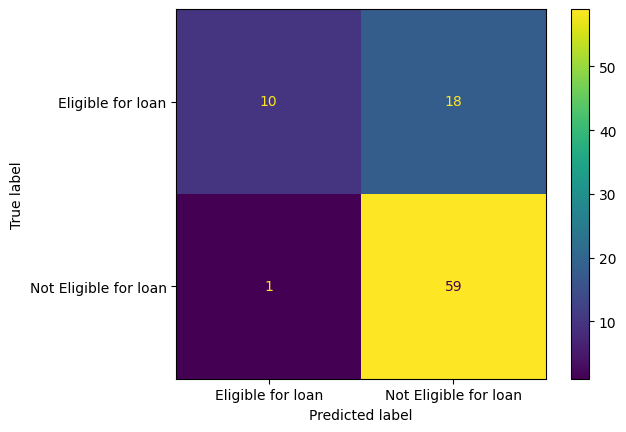

In [134]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Eligible for loan", "Not Eligible for loan"])
cm_display.plot()
plt.show()

In [139]:
Accuracy=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of the Kernel SVM:", Accuracy*100)

Precision = metrics.precision_score(y_test,y_pred)
print("Precision of the Kernel SVMl:", Precision*100)

Recall = metrics.recall_score(y_test,y_pred)
print("Recall of the Kernel SVM :", Recall*100)

f1score = metrics.f1_score(y_test, y_pred)
print("F1 score of the Kernel SVM:", f1score)

Accuracy of the Kernel SVM: 78.4090909090909
Precision of the Kernel SVMl: 76.62337662337663
Recall of the Kernel SVM : 98.33333333333333
F1 score of the Kernel SVM: 0.8613138686131386


***K-FOLD CROSS VALIDATION***

In [136]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_smote, y = y_train_smote, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.61 %
Standard Deviation: 9.81 %


***GRID SEARCH***

In [137]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_smote, y_train_smote)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.94 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


***AUC_ROC CURVE***

AUC-ROC: 0.6934523809523809


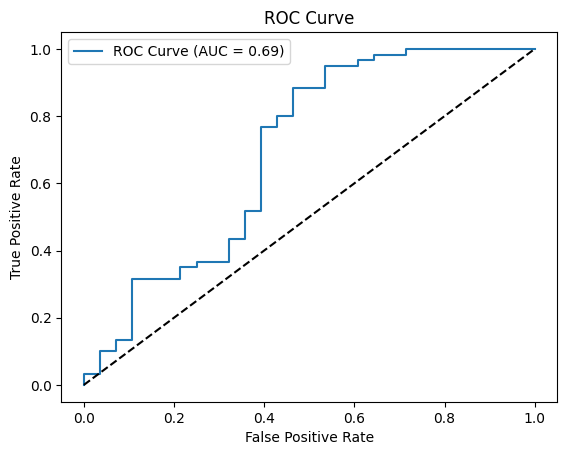

In [138]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_probs = classifier.predict_proba(X_test)[:, 1]


auc_roc = roc_auc_score(y_test, y_pred_probs)
print("AUC-ROC:", auc_roc)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()